<a href="https://colab.research.google.com/github/Parkshinhyang/Programmers/blob/main/%EC%8B%A0%EA%B3%A0_%EA%B2%B0%EA%B3%BC_%EB%B0%9B%EA%B8%B0(Lv_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 - 신고 결과 받기
https://school.programmers.co.kr/learn/courses/30/lessons/92334

## 문제 설명

신입사원 무지는 게시판 불량 이용자를 신고하고 처리 결과를 메일로 발송하는 시스템을 개발하려 합니다. 무지가 개발하려는 시스템은 다음과 같습니다.

- 각 유저는 한 번에 한 명의 유저를 신고할 수 있습니다.
    - 신고 횟수에 제한은 없습니다. 서로 다른 유저를 계속해서 신고할 수 있습니다.
    - 한 유저를 여러 번 신고할 수도 있지만, 동일한 유저에 대한 신고 횟수는 1회로 처리됩니다.
- k번 이상 신고된 유저는 게시판 이용이 정지되며, 해당 유저를 신고한 모든 유저에게 정지 사실을 메일로 발송합니다.
    - 유저가 신고한 모든 내용을 취합하여 마지막에 한꺼번에 게시판 이용 정지를 시키면서 정지 메일을 발송합니다.

다음은 전체 유저 목록이 ["muzi", "frodo", "apeach", "neo"]이고, k = 2(즉, 2번 이상 신고당하면 이용 정지)인 경우의 예시입니다.

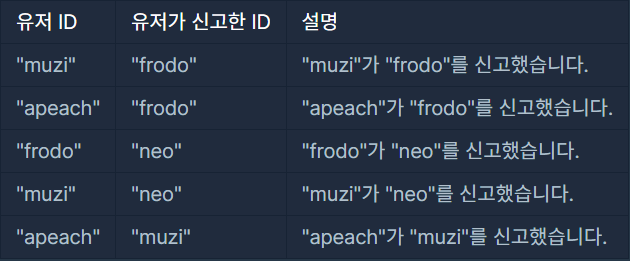

각 유저별로 신고당한 횟수는 다음과 같습니다.

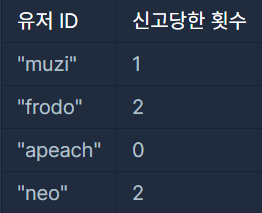

위 예시에서는 2번 이상 신고당한 "frodo"와 "neo"의 게시판 이용이 정지됩니다. 이때, 각 유저별로 신고한 아이디와 정지된 아이디를 정리하면 다음과 같습니다.

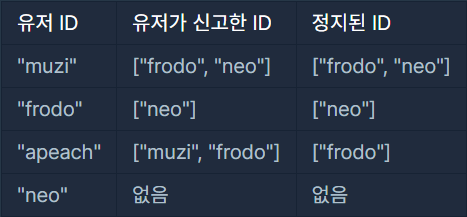

따라서 "muzi"는 처리 결과 메일을 2회, "frodo"와 "apeach"는 각각 처리 결과 메일을 1회 받게 됩니다.

이용자의 ID가 담긴 문자열 배열 id_list, 각 이용자가 신고한 이용자의 ID 정보가 담긴 문자열 배열 report, 정지 기준이 되는 신고 횟수 k가 매개변수로 주어질 때, 각 유저별로 처리 결과 메일을 받은 횟수를 배열에 담아 return 하도록 solution 함수를 완성해주세요.

## 제한사항

- 2 ≤ id_list의 길이 ≤ 1,000
    - 1 ≤ id_list의 원소 길이 ≤ 10
    - id_list의 원소는 이용자의 id를 나타내는 문자열이며 알파벳 소문자로만 이루어져 있습니다.
    - id_list에는 같은 아이디가 중복해서 들어있지 않습니다.
- 1 ≤ report의 길이 ≤ 200,000
3 ≤ report의 원소 길이 ≤ 21
    - report의 원소는 "이용자id 신고한id"형태의 문자열입니다.
    - 예를 들어 "muzi frodo"의 경우 "muzi"가 "frodo"를 신고했다는 의미입니다.
    - id는 알파벳 소문자로만 이루어져 있습니다.
    - 이용자id와 신고한id는 공백(스페이스)하나로 구분되어 있습니다.
    - 자기 자신을 신고하는 경우는 없습니다.
- 1 ≤ k ≤ 200, k는 자연수입니다.
- return 하는 배열은 id_list에 담긴 id 순서대로 각 유저가 받은 결과 메일 수를 담으면 됩니다.

## 입출력 예

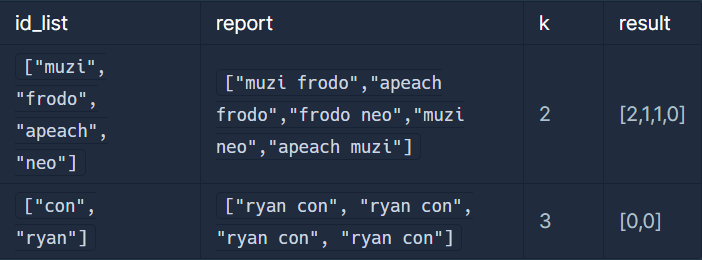

## 입출력 예 설명

### 입출력 예 #1

문제의 예시와 같습니다.

### 입출력 예 #2

"ryan"이 "con"을 4번 신고했으나, 주어진 조건에 따라 한 유저가 같은 유저를 여러 번 신고한 경우는 신고 횟수 1회로 처리합니다. 따라서 "con"은 1회 신고당했습니다. 3번 이상 신고당한 이용자는 없으며, "con"과 "ryan"은 결과 메일을 받지 않습니다. 따라서 [0, 0]을 return 합니다.

제한시간 안내
- 정확성 테스트 : 10초

## 첫 번째 방법

1. 중복되는 신고를 제거하기 위해 report를 set(report)하여 저장.
2. report의 원소를 공백을 제거하여 sort_report에 append.
3. sort_report에 있는 신고 당한 id마다 report_cnt에 값을 증가.
4. sort_id에 ld_list에 저장되어 있는 원소순으로 그 id가 신고한 id를 append.
5. report_cnt의 key들을 받아와 그 값이 k보다 크면 report_id에 append.
6. report_id에 존재하는 id가 id_list 원소순으로 저장되어 있는 sort_id에 존재할 경우 sum을 카운트한 후 answer에 append후 answer을 return.

결과 : 성공

In [44]:
def solution(id_list, report, k):
    answer = []
    sort_report, sort_id, report_id = [], [[] for _ in range(len(id_list))], []
    report_cnt = {key: 0 for key in id_list}
    for i in set(report):
        sort_report.append(i.split(" "))
    for i in sort_report:
        report_cnt[i[1]] += 1
    
    for i in sort_report:
        sort_id[id_list.index(i[0])].append(i[1])
    
    for i in report_cnt.keys():
        if report_cnt[i] >= k:
            report_id.append(i)
    for i in sort_id:
        sum = 0
        for j in range(len(report_id)):
            if report_id[j] in i:
                sum += 1
        answer.append(sum)
    return answer
solution(["con", "ryan"], ["ryan con", "ryan con", "ryan con", "ryan con"], 3)

[0, 0]